In [1]:
#### LIBRARIES AND FUNCTIONS
using DataFrames
using CSV
using JLD2
using Plots
using StatsBase
using LaTeXStrings

In [2]:
n_sim = 1:20; 
batches = ["SecondBatch"]#["FirstBatch" "SecondBatch" "ThirdBatch"]
T = 500

500

In [3]:
path = "./SecondBatch/data1/Data.jld2"
X = JLD2.load(path)
parameters = X["parameters"]
N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters

θs = zeros(length(n_sim)) 
OrdPar = zeros(length(n_sim)) 
OrdPar_Min = zeros(length(n_sim))
OrdPar_Max = zeros(length(n_sim))
N_network = zeros(length(n_sim))

for index in n_sim
    OrdPar_batch = zeros(length(t[t.>=T]))
    OrdPar_Min_batch = 0
    OrdPar_Max_batch = 0
    l_tot = 0
    for (index_str,str) in enumerate(batches)
        path = str*"/data"*string(index)*"/Data.jld2"#"./data/"*str*"/data"*string(index)*"/Data.jld2"
        try 
            X = JLD2.load(path)
            ord_par = X["order_parameter"]
            parameters = X["parameters"]
            N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters
            
            ord_par_asymp = ord_par[:, t .>= T ] 
            OrdPar_batch .+= mean(ord_par_asymp,dims=1)[:]
            OrdPar_Min_batch += mean( minimum(ord_par_asymp,dims=2) , dims=1)[1]
            OrdPar_Max_batch += mean( maximum(ord_par_asymp,dims=2) , dims=1)[1]
            l_tot += 1
            θs[index] = θ
            
        catch
            println(path*" does not exist")
        end
    end
    #OrdPar_batch ./= l_tot
    OrdPar[index] = mean(OrdPar_batch ./ l_tot)
    OrdPar_Min[index] = OrdPar_Min_batch ./ l_tot
    OrdPar_Max[index] = OrdPar_Max_batch ./ l_tot
    N_network[index] = l_tot
end

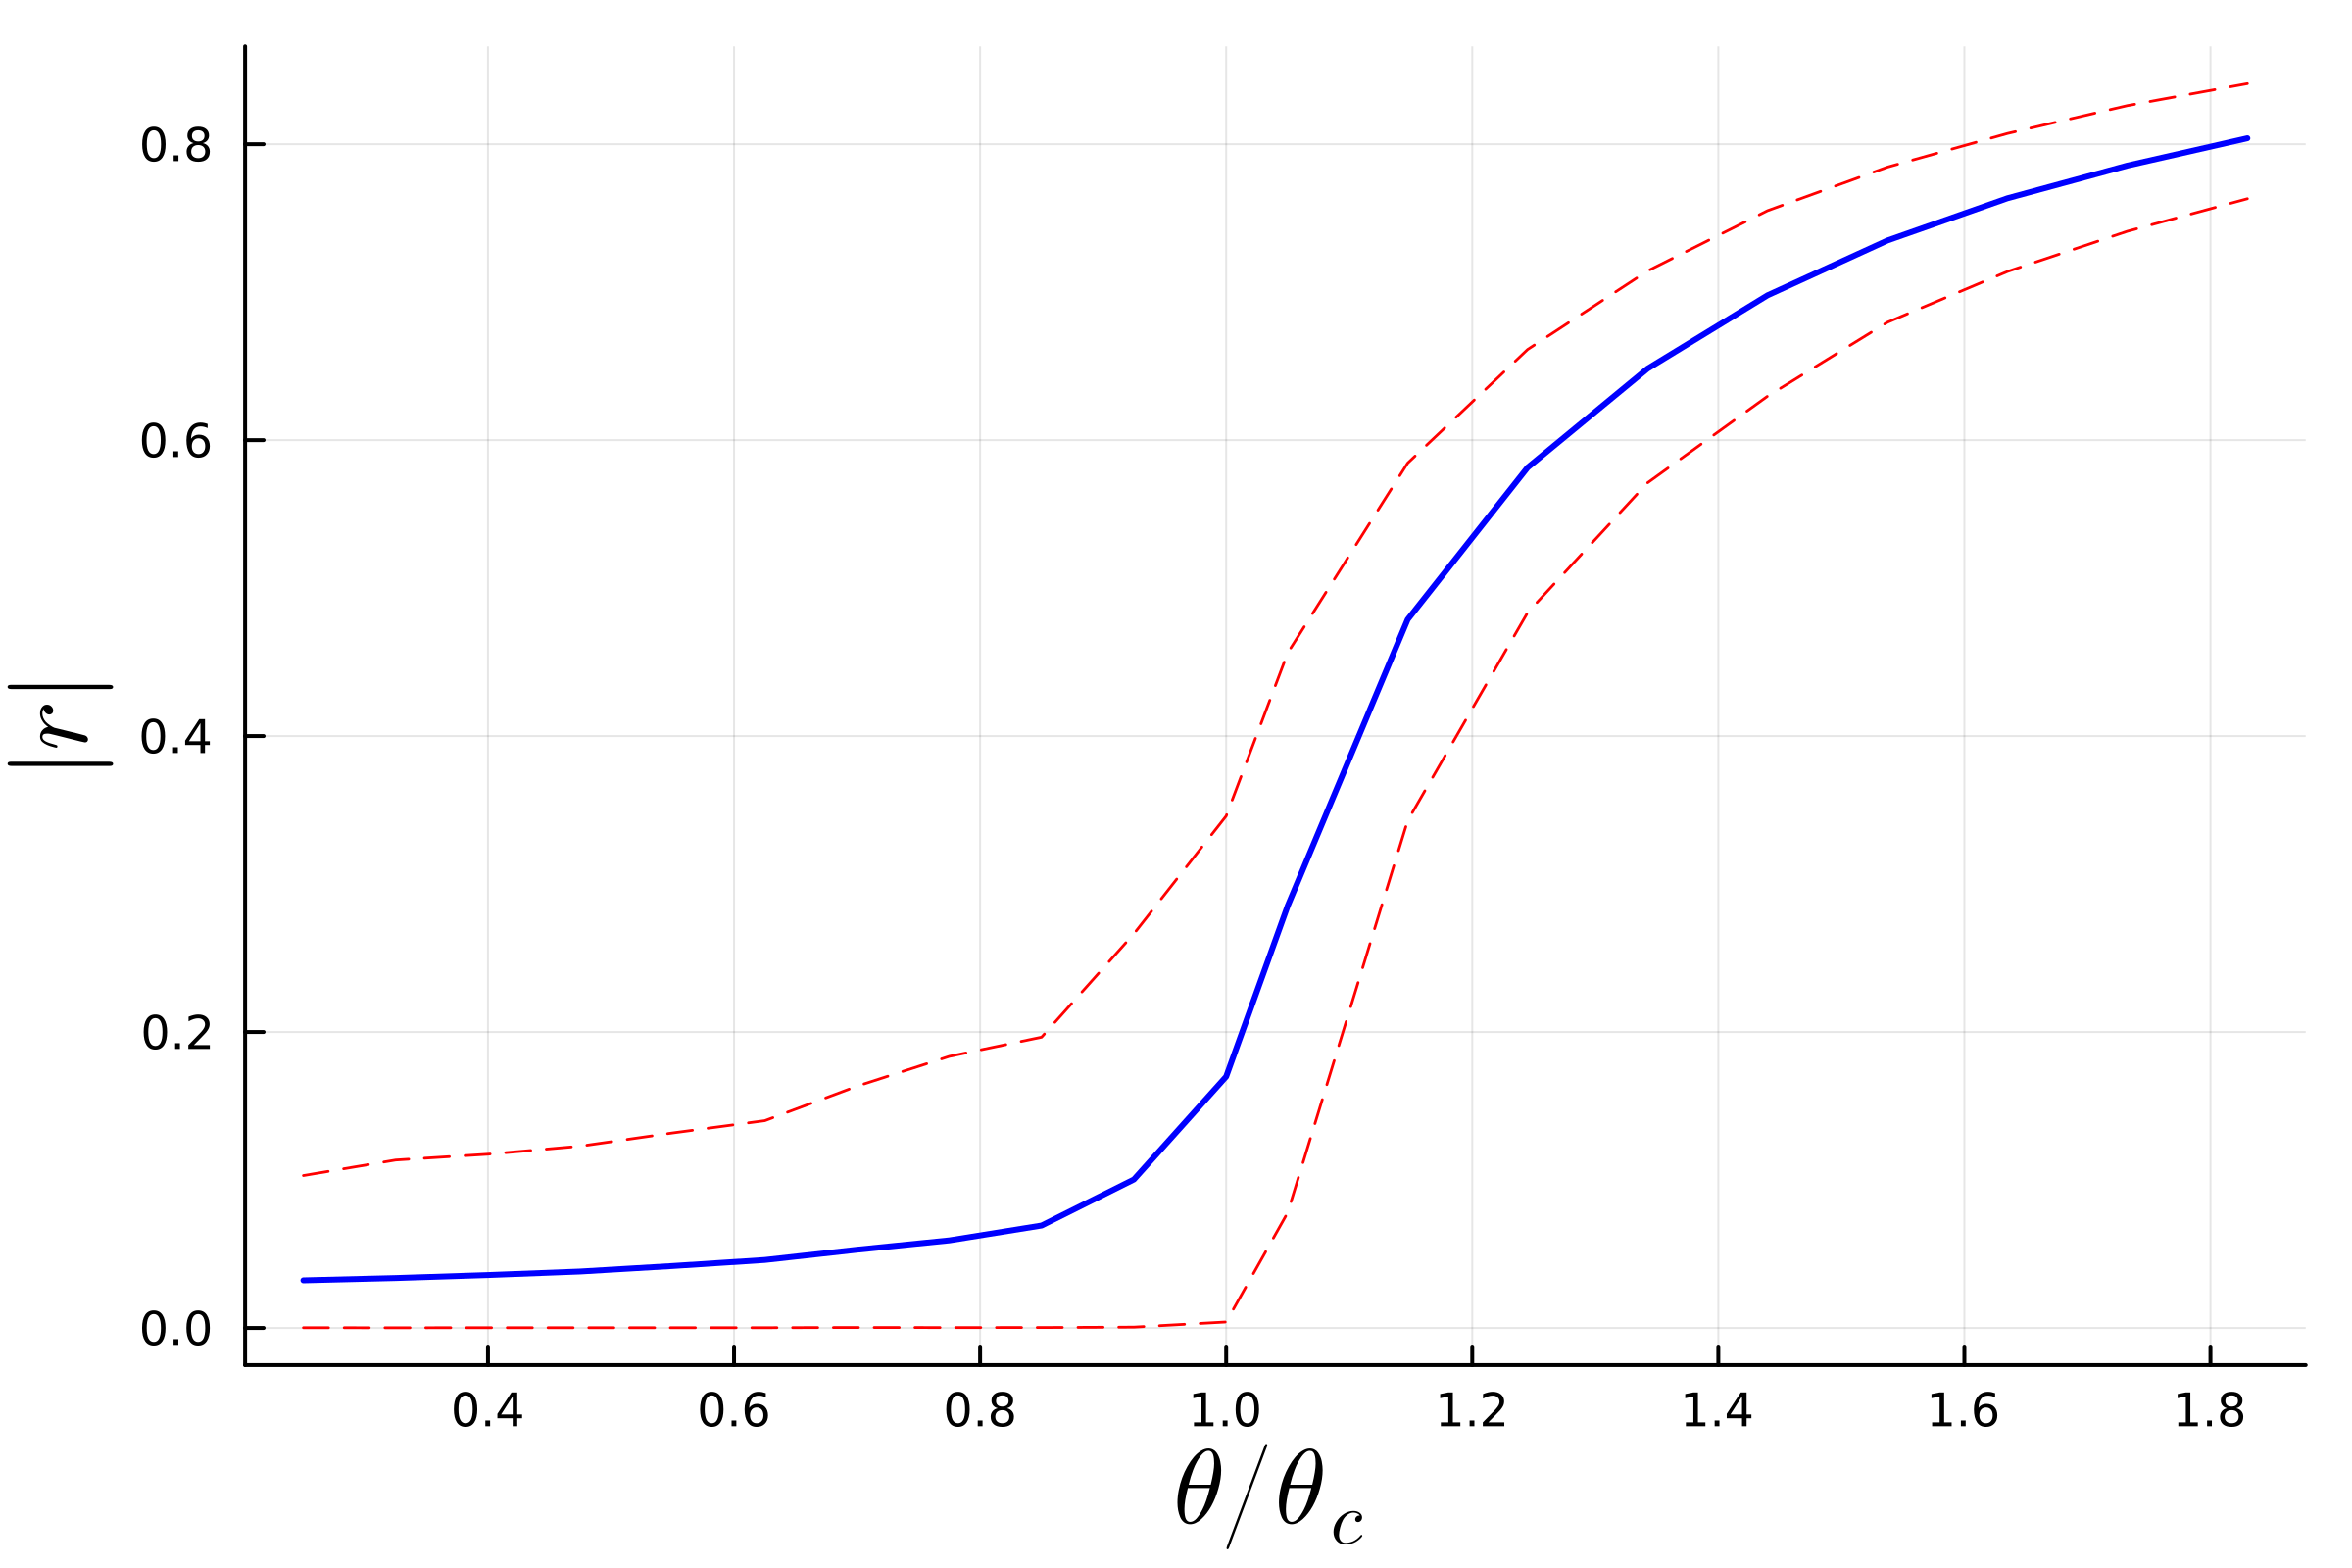

In [4]:
θs_ren = θs./(σ^2/p)
plot(θs_ren,OrdPar,color=:blue,linewidth=1.5,label="",dpi=400)
plot!(θs_ren,OrdPar_Min,color=:red,linestyle=:dash,linewidth=0.7,label="")
plot!(θs_ren,OrdPar_Max,color=:red,linestyle=:dash,linewidth=0.7,label="")
xlabel!(L"\theta/\theta_c",xguidefontsize=18)
ylabel!(L"|r|",yguidefontsize=18)
#savefig("Kuramoto_ER.png")